<a href="https://colab.research.google.com/github/enigmatized/OptionPricingCalculating/blob/main/OptionPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Geometric Brownian Motion')

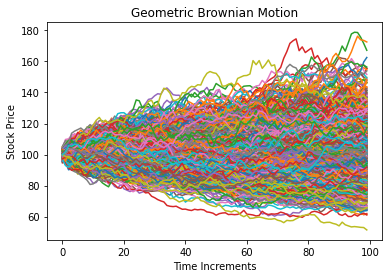

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

In [ ]:
def BinomialTree3(type,S0, K, r, sigma, T, N=2000,american="false"):
    #we improve the previous tree by checking for early exercise for american options
   
    #calculate delta T    
    deltaT = float(T) / N
 
    # up and down factor will be constant for the tree so we calculate outside the loop
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
 
    #to work with vector we need to init the arrays using numpy
    fs =  np.asarray([0.0 for i in range(N + 1)])
        
    #we need the stock tree for calculations of expiration values
    fs2 = np.asarray([(S0 * u**j * d**(N - j)) for j in range(N + 1)])
    
    #we vectorize the strikes as well so the expiration check will be faster
    fs3 =np.asarray( [float(K) for i in range(N + 1)])
    
 
    #rates are fixed so the probability of up and down are fixed.
    #this is used to make sure the drift is the risk free rate
    a = np.exp(r * deltaT)
    p = (a - d)/ (u - d)
    oneMinusP = 1.0 - p
 
   
    # Compute the leaves, f_{N, j}
    if type =="C":
        fs[:] = np.maximum(fs2-fs3, 0.0)
    else:
        fs[:] = np.maximum(-fs2+fs3, 0.0)
    
   
    #calculate backward the option prices
    for i in range(N-1, -1, -1):
       fs[:-1]=np.exp(-r * deltaT) * (p * fs[1:] + oneMinusP * fs[:-1])
       fs2[:]=fs2[:]*u
      
       if american=='true':
           #Simply check if the option is worth more alive or dead
           if type =="C":
                fs[:]=np.maximum(fs[:],fs2[:]-fs3[:])
           else:
                fs[:]=np.maximum(fs[:],-fs2[:]+fs3[:])
                
    # print fs
    return fs[0]
   

In [ ]:
#BinomialTree3(type,S0, K, r, sigma, T, N=2000,american="false"):
BinomialTree3('C',120, 130, 0.5, 2, 5, N=2000,american="true")

119.189758067766